# Lab 2. Search


## Task 2.1 Route Planning

---


### Problem Descriptions
Write a program to find a route, ideally an optimal one (shortest in this case), from any given pair of cities. <br>For example, if we start from city 1 and the destination is 5, the optimal route is highlighted in the graph with a total cost of 20.<br>

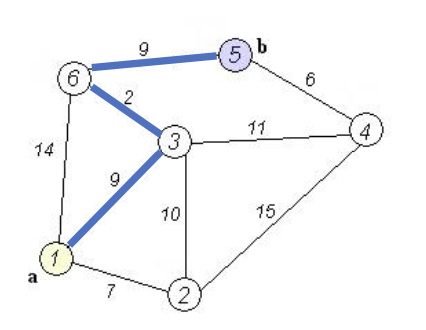

### Implementation and Results

In the route planning problem, we will formulate the problem as follows.
1. **State**: numbers representing cities, for e.g. 1 to 6. <br>
In code, we'll offset the city numbers by -1 to adjust for 0-based indexing used in arrays in python.
2. **Action**: we provide the list of cities reachable from the current state as actions. 
For example, if the current state is 1, we return [0, 2, 3], i.e. it is possible to travel to either of these cities from city 1.
3. **Goal test**: checks if the current state is the goal state.
4. **Path cost**: The cost matrix is given in the problem as a 6x6 array whose elements are distances between the pair of cities represented by 0 for self and '#' for no direct path.

In the following code, we have created 2 classes:
1.   **Route_Graph**: This class is used to represent a graph with a given number of vertices and a cost matrix that describes the cost to travel between each pair of cities. It contains methods to converts the graph into edge pair list representation and adjacency matrix form representation to be used by the methods of Search_Problem class.
2.   **Search_Problem**: This class is used to implement search algorithms on the object of Route_Graph. It stores the methods for Breadth First (BFS) Traversal, Depth-First Search (DFS) Traversal, Uniform Cost Search (UCS) Traversal, and utility methods for getting all possible actions, performing goal test and displaying path cost.

Comments are included in the code to explain the purpose of each method.

In [ ]:
# Route Graph class containing the problem graph and utility methods required
class Route_Graph:
  def __init__(self, vertices_count, cost_mtrx):
    self.vertices_names = [x for x in range(vertices_count)]
    self.cost_mtrx = cost_mtrx
    self.edges=self.get_edges()
    self.adj_mtrx=self.get_adjacency_mtrx()

  # Creates edge pairs between cities based on the cost matrix provided
  def get_edges(self):
    lst=[]
    initial = 0
    for i in self.cost_mtrx:
      #print(i, len(i))
      for j in range(len(i)):
        if(i[j]!='#' and i[j]!=0):
          lst.append([initial,j])
      initial+=1
    return lst

  # Creates list of possible destinations for each city in the graph
  def get_adjacency_mtrx(self):
    lst=[[] for _ in self.vertices_names]
    for x,y in self.edges:
      lst[x].append(y)
    return lst

  # Display edge pairs
  def print_edges(self):
    for x in self.edges:
      print(x)

  # Display list of possible destinations for each city
  def print_adjacency_mtrx(self):
    for i,x in enumerate(self.adj_mtrx):
      print(i," : ",x)


# Search Problem class containing Search methods along with utility methods required
class Search_Problem:
  def __init__(self, graph):
    self.data = graph
    self.open = []
    self.closed = []
    self.traverse_cost = [0 for x in range(len(self.data.adj_mtrx))]
    self.valid_paths = []

  # Initialises common variables between different methods
  def initialise(self):
    self.open = []
    self.closed = []
    self.traverse_cost = [0 for x in range(len(self.data.adj_mtrx))]
    self.valid_paths = []

  # Return all possible set of destinations for the current node
  def actions(self, curr):
    return self.data.adj_mtrx[curr]

  # Return TRUE if goal reached, otherwise FALSE
  def is_goal(self, curr, final):
    return curr==final
  
  # Return path cost for all destination nodes connected to current node
  def path_cost(self, curr):
    return self.data.cost_mtrx[curr]

  # Method for Best First Search Traversal
  def bfs_search(self, initial, final):
    initial -=1; final -= 1 # Offset array index for python
    self.initialise() # to clear variables in Search Problem class
    self.open.append(initial)
    self.valid_paths.append([initial])
    while(self.open):
      curr = self.open.pop(0)
      path = self.valid_paths.pop(0)
      #print(curr, path)
      if(self.is_goal(curr,final)): return path, self.traverse_cost[curr] # Goal Test
      if(curr in self.closed): continue

      cost_array = self.path_cost(curr) # List of Path costs
      adjacent_links = self.actions(curr) # List of possible Actions

      for link in adjacent_links:
        if(link not in self.open and link not in self.closed):
          # setting paths
          temp_path = path[0:]
          temp_path.append(link)
          self.valid_paths.append(temp_path)
          # appending to open list
          self.open.append(link)
          # equating cost of reaching this node from the initial node
          self.traverse_cost[link] = self.traverse_cost[curr] + cost_array[link]

      # added current node to closed list
      self.closed.append(curr)
    return "not valid", "infinite"
  
  # Method for Depth First Search Traversal
  def dfs_search(self, initial, final):
    initial -=1; final -= 1 # Offset array index for python
    self.initialise() # to clear variables in Search Problem class
    self.open.append(initial)
    self.valid_paths.append([initial])
    while(self.open):
      curr = self.open.pop(0)
      path = self.valid_paths.pop(0)
      #print(curr, path)
      if(self.is_goal(curr,final)): return path, self.traverse_cost[curr] # Goal Test
      if(curr in self.closed): continue

      cost_array = self.path_cost(curr) # List of Path costs
      adjacent_links = self.actions(curr) # List of possible Actions

      for link in adjacent_links:
        if(link in self.closed): continue
        elif(link not in self.open):
          # setting paths
          temp_path = path[0:]
          temp_path.append(link)
          self.valid_paths.insert(0,temp_path)
          # inserting link at start of to open list
          self.open.insert(0,link)
          # equating cost of reaching this node from the initial node
          self.traverse_cost[link] = self.traverse_cost[curr] + cost_array[link]
      # added current node to closed list
      self.closed.append(curr)
    return "not valid", "infinite"
  
  # Method for Uniform Cost Search Traversal
  def ucs_search(self, initial, final):
    initial -=1; final -= 1 # Offset array index for python
    self.initialise() # to clear variables in Search Problem class
    self.open.append(initial)
    self.valid_paths.append([initial])
    while(self.open):
      curr = self.open.pop(0)
      path = self.valid_paths.pop(0)
      #print(curr, path)
      if(self.is_goal(curr,final)): return path, self.traverse_cost[curr] # Goal Test
      if(curr in self.closed): continue

      cost_array = self.path_cost(curr) # List of Path costs
      adjacent_links = self.actions(curr) # List of possible Actions

      for link in adjacent_links:
        if(link not in self.open and link not in self.closed):
          # setting paths
          temp_path = path[0:]
          temp_path.append(link)
          self.valid_paths.append(temp_path)
          # appending to open list
          self.open.append(link)
          # equating cost of reaching this node from the initial node
          self.traverse_cost[link] = self.traverse_cost[curr] + cost_array[link]
        elif(link in self.open):
          if(self.traverse_cost[link] > self.traverse_cost[curr] + cost_array[link]): # if shorter path found
             self.traverse_cost[link] = self.traverse_cost[curr] + cost_array[link] # replace cost
             for all_paths in self.valid_paths:
               if(all_paths[-1]==link):
                 temp_path = path[0:]
                 temp_path.append(link)
                 self.valid_paths[self.valid_paths.index(all_paths)] = temp_path #replace path
      # added current node to closed list
      self.closed.append(curr)
    return "not valid", "infinite"
    

In this section, we provide the cost matrix from the problem and initialize objects of Route_Graph and Search_Problem class. We run the methods for BFS, DFS and UCS traversal and compare the results.

In [ ]:
# Cost Matrix provided in the problem
mtrx=[
      [0,7,9,'#','#',14],
      [7,0,10,15,'#','#'],
      [9,10,0,11,'#',2],
      ['#',15,11,0,6,'#'],
      ['#','#','#',6,0,9],
      [14,'#',2,'#',9,0],
      ]
# Initialize Route_Graph Object
start = Route_Graph(6,mtrx)

# Initialize Search_Problem Object by passing Route_Graph Object
s1 = Search_Problem(start)

path, cost = s1.bfs_search(1,5)
path = [x+1 for x in path] # Correct City labels
print("The sequence for BFS traversal is",path,"with a path cost of", cost)

path, cost = s1.dfs_search(1,5)
path = [x+1 for x in path] # Correct City labels
print("The sequence for DFS traversal is",path,"with a path cost of", cost)

path, cost = s1.ucs_search(1,5)
path = [x+1 for x in path] # Correct City labels
print("The sequence for UCS traversal is",path,"with a path cost of", cost)


The sequence for BFS traversal is [1, 6, 5] with a path cost of 23
The sequence for DFS traversal is [1, 6, 5] with a path cost of 23
The sequence for UCS traversal is [1, 3, 6, 5] with a path cost of 20


## Discussions
In this task, we created a program to find a route, ideally an optimal one (shortest in this case), from any given pair of cities using breadth-first search, depth-first search and uniform cost search traversals.

**Q1.** Use three methods of uniform-cost, breadth-first and depth-first search to find route from 1 to 5. <br>
> **Ans**. The methods are part of Search_Problem class. The methods to use for breadth-first search, depth-first search, uniform cost search are bfs_search, dfs_search, and ucs_search respectively.

**Q2.** Compare the results from these methods, and analyse their performance. 
> Ans. In the above code, all three methods (BFS, DFS and UCS) were able to find a path between city 1 and city 5. BFS and DFS methods found the same path with the same cost (23), while UCS was able to find a path with smaller cost (20) than the other two.<br>
While analysing their performance, we see BFS and DFS performed similarly as they found the same path. UCS however performed better and was able to find a less costly path by always expanding the vertex with the lowest cost first. 

## Task 2.2 The 8-Puzzle Problem

---


### Problem Descriptions
Write a program to find a solution for the 8-puzzle problem, given the initial and final states, using Greedy, A*, Breadth First and Depth First Search algorithms.<br>
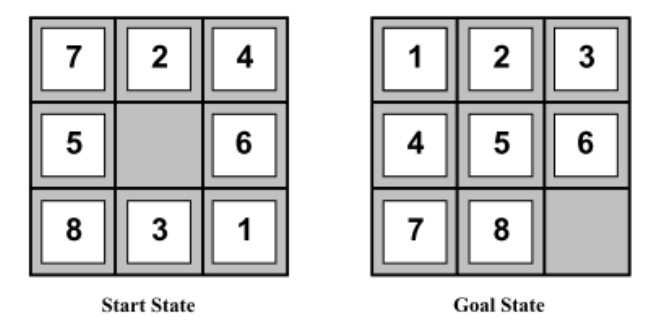

### Implementation and Results

In the 8-puzzle problem, we will formulate the problem as follows.
1. **State**: a 3x3 matrix representing the 8-puzzle with tiles numbered 0 to 8 and the blank space represented by '_'
2. **Action**: a list of possible states obtained by moving the empty space up, down, left or right.
3. **Goal test**: checks if the arrangement of tiles in the current matrix is similar to that of the goal matrix.
4. **Path cost**: The movement of each tile (or empty space in our case) incurs a cost of 1. 

In the following code, we have created 2 classes:
1.   **Puzzle_8**: This class represents the 8-puzzle problem. It takes in inputs for the start and the goal puzzle, and provides methods to input and display matrix, getting list of actions for any current state, select heuristic function to use, and implementations of heuristic functions on the basis of the number of misplaced tiles (h1) and on the basis of the sum of distances of tiles from their target positions (h2).
2.   **Search**: This class is used to implement search algorithms on the object of Puzzle_8 class. It contains the methods for A* Algorithm, Greedy Algorithm, Breadth First (BFS) Traversal, and Depth-First Search (DFS) Traversal, and utility methods for performing goal test and calculating f-cost.

Comments are included in the code to explain the purpose of each method.

In [ ]:
import time

# Class representing 8-puzzle problem
class Puzzle_8:

  ## initialise with the initial and goal states.
  def __init__(self, size, start=[], goal=[]):
    self.n = size

    # Manual Input of Start Matrix (if not provided already)
    if(len(start)==0):
      print("Enter Initial Matrix"); start = self.enterData()
    
    # Manual Input of Goal Matrix (if not provided already)
    if(len(goal)==0):
      print("Enter Final Matrix"); goal = self.enterData()
    
    self.start=start
    self.goal=goal

  ## function to choose which heuristic cost function to use
  def heuristic_cost(self,solution):
    #return self.h_cost_tiles(solution, self.goal) #h1
    return self.h_cost_steps(solution, self.goal) #h2

  ## Used to enter data manually
  def enterData(self):
    mtrx = []
    for i in range(self.n):
      mtrx.append(input().split())
    return mtrx

  ## Display Data in Matrix
  def displayData(self, mtrx):
    print("\n")
    for i in range(self.n):
      print(mtrx[i])
    print("\n")
  
  ## h1
  ## Calculates cost based on number of misplaced tiles
  def h_cost_tiles(self,start,goal): 
    sum1=0
    for i in range(self.n):
      for j in range(self.n):
        if(start[i][j]=='_'):
          continue
        if(start[i][j]!=goal[i][j]):
          sum1+=1
    return sum1

  ## h2
  ## Calculates cost based on sum of distances of tiles from their target positions
  def h_cost_steps(self, start, goal):
    sum1=0
    for i in range(self.n):
      for j in range(self.n):
        elem = goal[i][j]
        if(elem=='_'):
          continue
        ii, ji = self.findIndex(start,elem)
        ig, jg = self.findIndex(goal,elem)
        sum1 += abs(ii-ig) + abs(ji-jg)
    return sum1

  
  ## Used to find position of any element in the matrix
  def findIndex(self, arr, elem):
    for i in range(len(arr)):
      for j in range(len(arr[i])):
        if(arr[i][j]==elem):
          return i,j

  ## Action: Generates a list of possible positions that the empty space can be moved to  
  def get_steps(self, x,y):
    x_min, y_min = 0, 0
    x_max, y_max = self.n-1,self.n-1
    steps=[]
    if(x!=x_min): steps.append([x-1,y])
    if(x!=x_max): steps.append([x+1,y])
    if(y!=y_min): steps.append([x,y-1])
    if(y!=y_max): steps.append([x,y+1])
    return steps
    
    
# Class containing methods for search algorithms
class Search:
  def __init__(self, puzzle):
    self.puzzle=puzzle
    self.start=puzzle.start
    self.goal=puzzle.goal

    self.open=[]
    self.closed=[]

    #for a_star implementation
    self.levels={}
  
  # Initialises common variables between different methods
  def initialise(self):
    self.open=[]
    self.closed=[]
    self.levels={}
  
  # Method for hashing the matrix
  def to_str(self,mtrx):
    str1=""
    for x in mtrx:
      str1 = str1 + "".join(x)
    return str1

  # Return True if Goal Test is successful
  def is_goal(self,solution):
    # If goal state = current state, then heuristic cost is 0
    return (self.puzzle.heuristic_cost(solution)==0)

  # Get number of moves from the start state
  def get_level(self,solution):
    return self.levels[self.to_str(solution)]
  
  # Returns f-cost based on the current state
  def f_cost(self,solution):
    return self.puzzle.heuristic_cost(solution) + self.get_level(solution)


  # Method for A-star algorithm implementation
  def astar(self):
    self.initialise()
    start = self.start
    goal = self.goal

    self.open.append(start)
    self.levels[self.to_str(start)] = 0 # initial level = 0

    while(self.open):
      # Sorting Self.open based on heuristic values + path cost
      self.open = sorted(self.open, key=self.f_cost)

      solution = self.open.pop(0)
      solution_level = self.get_level(solution)

      self.puzzle.displayData(solution)

      print("Level:",solution_level,", heuristic-cost:",self.puzzle.heuristic_cost(solution),", f-cost:",self.f_cost(solution))

      if self.is_goal(solution): print("Reached Goal"); return; # IS GOAL TEST
      
      x,y = self.puzzle.findIndex(solution,'_') # find index of _ to find actions at any position
      actions = self.puzzle.get_steps(x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b = actions.pop(0)

        # Code for swapping positions
        temp=new_state[x][y]
        new_state[x][y]=new_state[a][b]
        new_state[a][b]=temp

        if(new_state not in self.open and new_state not in self.closed):
          self.open.append(new_state)
          self.levels[self.to_str(new_state)] = solution_level + 1
      self.closed.append(solution)
    return "Solution Not Found"
    

  # Method for Greedy algorithm implementation
  def greedy(self):
    self.initialise()
    start = self.start
    goal = self.goal

    self.open.append(start)
    self.levels[self.to_str(start)] = 0 # initial level = 0

    while(self.open):
      # Sorting Self.open based on heuristic values alone
      self.open = sorted(self.open, key=self.puzzle.heuristic_cost)

      solution = self.open.pop(0)
      solution_level = self.get_level(solution)
      
      self.puzzle.displayData(solution)

      print("Level:",solution_level,", heuristic-cost:",self.puzzle.heuristic_cost(solution))

      if self.is_goal(solution): print("Reached Goal"); return; # IS GOAL TEST
      
      x,y = self.puzzle.findIndex(solution,'_') # find index of _ to find actions at any position
      actions = self.puzzle.get_steps(x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b = actions.pop(0)

        # Code for swapping positions
        temp=new_state[x][y]
        new_state[x][y]=new_state[a][b]
        new_state[a][b]=temp

        if(new_state not in self.open and new_state not in self.closed):
          self.open.append(new_state)
          self.levels[self.to_str(new_state)] = solution_level + 1
      self.closed.append(solution)
    return "Solution Not Found"

  # Method for BFS algorithm implementation
  def bfs(self):
    self.initialise()
    start = self.start
    goal = self.goal

    self.open.append(start)
    self.levels[self.to_str(start)] = 0 # initial level = 0
    while(self.open):
      # Self.open is in FIFO configuration
      solution = self.open.pop(0)
      solution_level = self.get_level(solution)

      self.puzzle.displayData(solution)
      
      print("Level:",solution_level)

      if self.is_goal(solution): print("Reached Goal"); return; # IS GOAL TEST
      
      x,y = self.puzzle.findIndex(solution,'_') # find index of _ to find actions at any position
      actions = self.puzzle.get_steps(x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b = actions.pop(0)

        # Code for swapping positions
        temp=new_state[x][y]
        new_state[x][y]=new_state[a][b]
        new_state[a][b]=temp

        if(new_state not in self.open and new_state not in self.closed):
          self.open.append(new_state)
          self.levels[self.to_str(new_state)] = solution_level + 1
      self.closed.append(solution)
    return "Solution Not Found"

  
  # Method for DFS algorithm implementation
  def dfs(self):
    self.initialise()
    start = self.start
    goal = self.goal

    self.open.append(start)
    while(self.open):
      # Self.open is in LIFO configuration
      solution = self.open.pop(0)
      self.puzzle.displayData(solution)
      if self.is_goal(solution): print("Reached Goal"); return; # IS GOAL TEST
      
      x,y = self.puzzle.findIndex(solution,'_') # find index of _ to find actions at any position
      actions = self.puzzle.get_steps(x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b = actions.pop(0)

        # Code for swapping positions
        temp=new_state[x][y]
        new_state[x][y]=new_state[a][b]
        new_state[a][b]=temp

        if(new_state not in self.open and new_state not in self.closed):
          self.open.insert(0,new_state)
      self.closed.append(solution)
    return "Solution Not Found"
    

In this section, we'll initialize objects of Puzzle_8 and Search class, and use the methods of astar, greedy, bfs and dfs to solve easy, medium and hard puzzles.

In [ ]:
start_easy = [['1', '4', '2'],
              ['3', '5', '8'],
              ['6', '7', '_']]

start_med = [['1', '4', '2'],
             ['5', '_', '8'],
             ['3', '6', '7']]

start_hard  = [['7', '2', '4'],
               ['5', '_', '6'],
               ['8', '3', '1']]

goal  = [['_','1','2'],
         ['3','4','5'],
         ['6','7','8']]

# Create puzzle object
puzzle = Puzzle_8(3,start_easy,goal)

# Create Search object
search = Search(puzzle)

# Execute and evaluate performance of Greedy search algorithm
#start_time = time.time()
search.greedy()
#print("Time Taken for Greedy:", time.time() - start_time)


# Execute and evaluate performance of A* algorithm
#start_time = time.time()
search.astar()
#print("Time Taken for Astar:", time.time() - start_time)

# Executes Breadth-First Search algorithm
search.bfs()

# Executes Depth-First Search algorithm
#search.dfs()




['1', '4', '2']
['3', '5', '8']
['6', '7', '_']


Level: 0 , heuristic-cost: 4


['1', '4', '2']
['3', '5', '_']
['6', '7', '8']


Level: 1 , heuristic-cost: 3


['1', '4', '2']
['3', '_', '5']
['6', '7', '8']


Level: 2 , heuristic-cost: 2


['1', '_', '2']
['3', '4', '5']
['6', '7', '8']


Level: 3 , heuristic-cost: 1


['_', '1', '2']
['3', '4', '5']
['6', '7', '8']


Level: 4 , heuristic-cost: 0
Reached Goal


['1', '4', '2']
['3', '5', '8']
['6', '7', '_']


Level: 0 , heuristic-cost: 4 , f-cost: 4


['1', '4', '2']
['3', '5', '_']
['6', '7', '8']


Level: 1 , heuristic-cost: 3 , f-cost: 4


['1', '4', '2']
['3', '_', '5']
['6', '7', '8']


Level: 2 , heuristic-cost: 2 , f-cost: 4


['1', '_', '2']
['3', '4', '5']
['6', '7', '8']


Level: 3 , heuristic-cost: 1 , f-cost: 4


['_', '1', '2']
['3', '4', '5']
['6', '7', '8']


Level: 4 , heuristic-cost: 0 , f-cost: 4
Reached Goal


['1', '4', '2']
['3', '5', '8']
['6', '7', '_']


Level: 0


['1', '4', '2']
['3', '5', '_']
['6', '7'

## Discussions
In this task, we created a program to find the solution to the 8-puzzle problem using greedy, A*, breadth-first search and depth-first search algorithm implementations.

**Q1.** Use various methods such as A-star, greedy, breadth-first and depth-first search to the simple case, compare the results and discuss the performance. <br>
> **Ans**. We have implemented the A-star, greedy, breadth-first and depth-first search algorithms in our code above. <br>Comparing the results when using it on the simple case, A-star and Greedy were the most efficient, while DFS was the least efficient as it failed to give an output within in a very large time due to branching factor and infinite depth in the graph. BFS was also able to find the solution, although not as efficiently as A-star and Greedy as it took large number of steps to reach the goal. The path-cost for reaching the goal was 4 for a-star, greedy and bfs algorithms.

**Q2.** Implement both h1 and h2 as heuristic function, use them with greedy and A* search to solve the difficult case (solution depth = 26). Discuss your results. <br>
> **Ans**. The heuristic functions h1 and h2 are implemented in h_cost_tiles() and h_cost_steps() respectively of the Puzzle_8 class. We have heuristic_cost() method of the same class, to select between the two heuristic methods. <br>
The results show that the greedy search algorithm using h1 heuristic function took 5.82 seconds to find the solution at level 54, while using h2 heuristic, it was able to find it in 3.41 seconds at level 56.<br>
The A-star algorithm using h1 heuristic, did not complete in the given time frame of 5 minutes, while using h2 heuristic, it was able to find the solution at level 26 in 163 seconds. <br>
Overall, the h2 heuristic function using the sum of distances of tiles from their target positions is more effective in finding the solution using greedy and astar algorithms.

## Task 2.3 The Maze Problem

---


### Problem Descriptions
In this task, we will write a program to solve a maze problem, i.e. find a route (ideally the shortest one) from the start (labelled as ‘O’ in the map) to the target (labelled as ‘X’). Other symbols in the map are ‘#’ for walls that you cannot go through and blanks that you can go through freely.<br>For this problem, we'll try to find the solution using Greedy, A*, Breadth First and Depth First Search algorithms.<br>

### Implementation and Results
In the maze problem, we will formulate the problem as follows.
1. **State**: represented by the pair (x,y) denoting our current position in the maze.
2. **Action**: a list of possible states that we're able to move to, typically up, down, left or right (or diagonal moves in further questions) from our current position.
3. **Goal test**: checks if the heuristic cost is 0, which would indicate that the maze is solved.
4. **Path cost**: Each movement would incur a cost predefined in our problem. For horizontal or vertal movements, the cost is 1, while diagonal movements have a cost of 1.4.

In the following code, we have created Maze_Solver class which contains the following methods:
1.   **get_steps**: returns the list of all possible actions from the current position.
2.   **is_goal**: returns True if the heuristic cost is 0, i.e. if the goal has been reached.
3.   **heuristic_cost**: returns heuristic cost associated with reaching goal from start.
4.   **f_cost**: returns heuristic cost + path cost for use with A-star implementation
5.   **greedy**: Implementation of Greedy search algorithm
6.   **astar**: Implementation of A-star search algorithm
7.   **bfs**: Implementation of Breadth-First search algorithm
8.   **dfs**: Implementation of Depth-First search algorithm
9.   Other utility functions to calculate current position in the maze, hashing the solution and display the maze

Comments are included in the code to explain the purpose of each method.

In [ ]:
import math

MAP = """
##############################
#         #              #   #
# ####    ########       #   #
#  o #    #              #   #
#    ###     ####   ######   #
#         ####      #        #
#            #  #   #   #### #
#     ######    #       # x  #
#        #      #            #
##############################
"""
MAP = [list(x) for x in MAP.split("\n") if x]

COSTS = {
    "up": 1.0,
    "down": 1.0,
    "left": 1.0,
    "right": 1.0,
    "up left": 1.4,
    "up right": 1.4,
    "down left": 1.4,
    "down right": 1.4,
}


In [ ]:
class Maze_Solver:
  def __init__(self, maze, costs):
    self.maze=maze
    self.costs = costs
    self.path_costs = {}
    self.start='o'
    self.goal='x'

    self.open=[]
    self.closed=[]

    #for a_star implementation
    self.levels = {}
    self.reached = []
  
  # Initialises common variables between different methods
  def initialise(self):
    self.open=[]
    self.closed=[]
    self.levels={}
    self.path_costs={}
    self.reached=[]
  
  # For Hashing the current matrix state
  def to_tuple(self,mtrx):
    tup=tuple(tuple(x) for x in mtrx)
    return tup
  
  ## Display Data in Matrix
  def displayData(self, mtrx):
    print("\n")
    for i in range(len(mtrx)):
      print("".join(mtrx[i]))
    print("\n")

  # Goal Test
  def is_goal(self,solution):
    return (self.heuristic_cost(solution)==0)
  
  def get_level(self,solution):
    return self.levels[self.to_tuple(solution)]
  
  # Calculates f-cost for A* algorithm
  def f_cost(self,solution):
    return self.heuristic_cost(solution) + self.path_costs[self.to_tuple(solution)]

  ## Calculates heuristic cost based on absolute moves required or euclidian distance
  def heuristic_cost(self, solution): 
    x_start, y_start = self.findIndex(solution,'o')
    x_goal, y_goal = self.findIndex(solution,'x')

    # Goal outside of maze
    if((x_goal,y_goal)==(-99,-99)):
      return 0
    
    # Complex heuristic using euclidian distance
    return math.sqrt((x_start - x_goal) ** 2 + (y_start - y_goal) ** 2)

    # Simple heuristic using absolute horizontal and vertical moves required
    #return abs(x_start - x_goal) + abs(y_start - y_goal)

    
  ## Used to find position of any element in the matrix
  def findIndex(self, solution, elem):
    for i in range(len(solution)):
      for j in range(len(solution[i])):
        if(solution[i][j]==elem):
          return i,j
    return -99,-99

  ## Action: Used to get possible actions
  def get_steps(self, solution, x,y):
    steps=[]
    costs = self.costs
    if(solution[x-1][y] != '#' and solution[x-1][y] != '.'): steps.append([x-1,y,costs["up"]])
    if(solution[x+1][y] != '#' and solution[x+1][y] != '.'): steps.append([x+1,y,costs["down"]])
    if(solution[x][y-1] != '#' and solution[x][y-1] != '.'): steps.append([x,y-1,costs["left"]])
    if(solution[x][y+1] != '#' and solution[x][y+1] != '.'): steps.append([x,y+1,costs["right"]])

    # Additional diagonal moves
    if(solution[x-1][y-1]!='#' and solution[x-1][y-1]!='.'): steps.append([x-1,y-1,costs["up left"]])
    if(solution[x-1][y+1]!='#' and solution[x-1][y+1]!='.'): steps.append([x-1,y+1,costs["up right"]])
    if(solution[x+1][y-1]!='#' and solution[x+1][y-1]!='.'): steps.append([x+1,y-1,costs["down left"]])
    if(solution[x+1][y+1]!='#' and solution[x+1][y+1]!='.'): steps.append([x+1,y+1,costs["down right"]])
    return steps
  
  # Implementation of greedy search algorithm
  def greedy(self):
    self.initialise()
    start_maze = self.maze
    self.open.append(start_maze)
    self.path_costs[self.to_tuple(start_maze)] = 0

    self.levels[self.to_tuple(start_maze)] = 0

    while(self.open):
      # Self.open should be sorted based on heuristic values 
      self.open = sorted(self.open, key=self.heuristic_cost)
      solution = self.open.pop(0)
      #self.displayData(solution)
      
      solution_level = self.get_level(solution)
      
      solution_cost = self.path_costs[self.to_tuple(solution)]

      #if(solution_cost % 1 > 0): print(solution_cost); self.displayData(solution); input()
      
      
      if self.is_goal(solution): # IS GOAL TEST
        self.displayData(solution)
        print("Reached Goal using Greedy algorithm")
        print("Total Steps:",solution_level,", Path Costs:", solution_cost)
        return; 

      x,y = self.findIndex(solution,'o') # find index of 'o' 

      actions = self.get_steps(solution, x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b,cost = actions.pop(0)

        # Code for marking path
        temp = new_state[x][y] #'o'
        new_state[x][y] = "."
        new_state[a][b] = temp

        if(new_state not in self.open and new_state not in self.closed):
          self.open.append(new_state)
          self.levels[self.to_tuple(new_state)] = solution_level + 1
          self.path_costs[self.to_tuple(new_state)] = round(solution_cost + cost,1)
      self.closed.append(solution)

  # Implementation of A* search algorithm
  def astar(self):
    self.initialise()
    start_maze = self.maze
    self.open.append(start_maze)
    self.path_costs[self.to_tuple(start_maze)] = 0

    self.levels[self.to_tuple(start_maze)] = 0

    while(self.open):
      # Self.open should be sorted based on heuristic values + level from the start node 
      self.open = sorted(self.open, key=self.f_cost)
      solution = self.open.pop(0)
      #self.displayData(solution)
      
      solution_level = self.get_level(solution)

      solution_cost = self.path_costs[self.to_tuple(solution)]

      
      #print("Level:",solution_level,", h-cost:",self.heuristic_cost(solution),", f-cost:",self.f_cost(solution))
      
      if self.is_goal(solution): 
        # IS GOAL TEST
        self.displayData(solution)
        print("Reached Goal using A* Algorithm")
        print("Total Steps:",solution_level,", Path Costs:", solution_cost)
        return; 

      x,y = self.findIndex(solution,'o') # find index of 'o' 

      self.reached.append((x,y)) # (x,y) is reached

      actions = self.get_steps(solution, x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b,cost = actions.pop(0)
        
        if((a,b) in self.reached): continue # Point already visited

        # Code for marking path
        temp = new_state[x][y] #'o'
        new_state[x][y] = "."
        new_state[a][b] = temp


        if(new_state not in self.open and new_state not in self.closed):
          self.open.append(new_state)
          self.levels[self.to_tuple(new_state)] = solution_level + 1
          self.path_costs[self.to_tuple(new_state)] = round(solution_cost + cost, 1)
          self.reached.append((a,b)) # (a,b) is reached
          #self.displayData(new_state)
          #input()
      self.closed.append(solution)

  # Method for Breadth-First Search algorithm implementation
  def bfs(self):
    self.initialise()

    start_maze = self.maze
    self.open.append(start_maze)
    self.path_costs[self.to_tuple(start_maze)] = 0
    self.levels[self.to_tuple(start_maze)] = 0

    while(self.open):
      # Self.open is in FIFO configuration
      solution = self.open.pop(0)
      #self.displayData(solution)
      
      solution_level = self.get_level(solution)

      solution_cost = self.path_costs[self.to_tuple(solution)]

      
      #print("Level:",solution_level,", h-cost:",self.heuristic_cost(solution),", f-cost:",self.f_cost(solution))
      
      if self.is_goal(solution): 
        # IS GOAL TEST
        self.displayData(solution)
        print("Reached Goal using BFS Algorithm")
        print("Total Steps:",solution_level,", Path Costs:", solution_cost)
        return; 

      x,y = self.findIndex(solution,'o') # find index of 'o' 

      self.reached.append((x,y)) # (x,y) is reached

      actions = self.get_steps(solution, x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b,cost = actions.pop(0)
        
        if((a,b) in self.reached): continue # Point already visited

        # Code for marking path
        temp = new_state[x][y] #'o'
        new_state[x][y] = "."
        new_state[a][b] = temp


        if(new_state not in self.open and new_state not in self.closed):
          self.open.append(new_state)
          self.levels[self.to_tuple(new_state)] = solution_level + 1
          self.path_costs[self.to_tuple(new_state)] = round(solution_cost + cost, 1)
          self.reached.append((a,b)) # (a,b) is reached
      self.closed.append(solution)

    return "Solution Not Found"

  # Method for Depth-First Search algorithm implementation
  def dfs(self):
    self.initialise()

    start_maze = self.maze
    self.open.append(start_maze)
    self.path_costs[self.to_tuple(start_maze)] = 0
    self.levels[self.to_tuple(start_maze)] = 0

    while(self.open):
      # Self.open is in FIFO configuration
      solution = self.open.pop(0)
      #self.displayData(solution)
      
      solution_level = self.get_level(solution)

      solution_cost = self.path_costs[self.to_tuple(solution)]

      
      #print("Level:",solution_level,", h-cost:",self.heuristic_cost(solution),", f-cost:",self.f_cost(solution))
      
      if self.is_goal(solution): 
        # IS GOAL TEST
        self.displayData(solution)
        print("Reached Goal using DFS Algorithm")
        print("Total Steps:",solution_level,", Path Costs:", solution_cost)
        return; 

      x,y = self.findIndex(solution,'o') # find index of 'o' 

      self.reached.append((x,y)) # (x,y) is reached

      actions = self.get_steps(solution, x,y) # Left, Right, Top, Bottom

      new_states=[]
      while(actions):
        ##VERY IMPORTANT
        new_state = [row[:] for row in solution] # trying to prevent call by reference
        a,b,cost = actions.pop(0)
        
        if((a,b) in self.reached): continue # Point already visited

        # Code for marking path
        temp = new_state[x][y] #'o'
        new_state[x][y] = "."
        new_state[a][b] = temp


        if(new_state not in self.open and new_state not in self.closed):
          self.open.insert(0,new_state)
          self.levels[self.to_tuple(new_state)] = solution_level + 1
          self.path_costs[self.to_tuple(new_state)] = round(solution_cost + cost, 1)
          self.reached.append((a,b)) # (a,b) is reached
      self.closed.append(solution)

    return "Solution Not Found"
  

''' Main function begins '''

maze_solver = Maze_Solver(MAP, COSTS)
maze_solver.astar()
maze_solver.greedy()
maze_solver.bfs()
maze_solver.dfs()




##############################
#         #              #   #
# ####    ########       #   #
#  . #    #  ....        #   #
#   .###  ...####.  ######   #
#    .....####    . #        #
#            #  #  .#   #### #
#     ######    #   ....#.o  #
#        #      #       .    #
##############################


Reached Goal using A* Algorithm
Total Steps: 23 , Path Costs: 27.0


##############################
#         #              #   #
# ####    ########       #   #
#  . #    #              #   #
#   .###     ####   ######   #
#    .    ####  .   #        #
#     ...... # .#.  #   #### #
#     ######... # ......#.o  #
#        #      #       .    #
##############################


Reached Goal using Greedy algorithm
Total Steps: 23 , Path Costs: 27.0


##############################
#         #              #   #
# ####    ########       #   #
#  . #    #  ....        #   #
#   .###  ...####.  ######   #
#    .....####    . #        #
#            #  #  .#   #### #
#     ######   

## Discussions
In this task, we created a program to find the solution to the maze problem using greedy, A* algorithms using two different heuristic functions

**Q1.** Define the search problem by briefly describing the state, action, goal test and path cost. <br>
> **Ans**. In the maze problem, we will formulate the solution to traverse the maze (represented as a 2D grid) from defined start and goal positions, while avoiding walls, as follows.
1. **State**: represented by the pair (x,y) denoting our current position in the maze.
2. **Action**: a list of possible states that we're able to move to, typically up, down, left or right (or diagonal moves in further questions) from our current position.
3. **Goal test**: checks if the heuristic cost is 0, which would indicate that the maze is solved.
4. **Path cost**: Each movement would incur a cost predefined in our problem. For horizontal or vertal movements, the cost is 1, while diagonal movements have a cost of 1.4.

**Q2.** Define a heuristic function for the search problem. <br>
> **Ans**. The heuristic functions for traversing the maze from the current positio (o) to the goal position (x) can be defined in two ways. In both, we use the utility function *findIndex()* to find the coordinates of the current and goal positions (or return -99,-99 if goal is not present in the grid).<br>
For simple heuristic, we'll calculate the manhattan distance from the current to the goal location, by summing up the absolute horizontal and vertical moves required to reach the goal position.<br>
For complex heuristic, we'll calculate the euclidian distance from the current to the goal location.<br>
The code for both these methods is implemented in the *heuristic_cost()* method.

**Q3.** Use A-star to find a route from start to target, displaying number of moves and total costs. <br>
> **Ans**. The *astar()* method provides the implementation of the A-star algorithm to find a route from start to goal.

**Q4.** Use other search algorithms such as greedy, breadth-first and depth-first etc. Check if you can find a route as good as the one from A*. Explain your results. <br>
> **Ans**. From the results of the implementations of Greedy, A-star, Breadth-first and Depth-first search to our maze problem, we were able to find 4 different paths for the solution in the same number of steps (33) with the same path cost (33), implying that all 4 algorithms had similar performance for the given maze layout. It is also possible that the results would differ significantly by using different heuristic such as the manhattan distance, or given a different maze layout.

**Q5.** Extend the search by four additional diagonal moves – up left, up right, down left and down right. Assign these diagonal moves with 1.4x of the other moves. Try the A* algorithm again and compare the results. <br>
> **Ans**. The additional diagonal moves and their associated costs are implemented in the *get_steps()* method. <br>
Without using the diagonal moves, A-star algorithm is able to find the solution in 33 moves and a total cost of 33.0. When diagonal moves are also allowed, the algorithm finds the solution in 23 moves with a total cost of 27.0. <br>
Overall, the use of additional diagonal moves allows for a better performance in the A-star algorithm as it is able to find a shorter path with a lower cost.